In [1]:
import os
os.getcwd()

'd:\\mlpipeline\\notebooks'

In [2]:
os.chdir("D:/mlpipeline")
os.getcwd()

'D:\\mlpipeline'

In [3]:
import polars as pl
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pl.scan_csv("test_task_data.csv", separator=",") # Scan instead of read to not read into memory before we actually need to
df.collect_schema() # Check the schema of the dataset

Schema([('Transaction_id', Int64),
        ('customer_id', Int64),
        ('Date', String),
        ('Product', String),
        ('Gender', String),
        ('Device_Type', String),
        ('Country', String),
        ('State', String),
        ('State_duplicated_0', String),
        ('City', String),
        ('Category', String),
        ('Customer_Login_type', String),
        ('Delivery_Type', String),
        ('Transaction_Result', Int64),
        ('Amount US$', String),
        ('Individual_Price_US$', String),
        ('Year_Month', String),
        ('Time', String),
        ('Quantity', Int64)])

In [5]:
df.describe() # Descriptive statistics of the dataset and its columns

statistic,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,f64
"""count""",65535.0,65535.0,"""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""",65535.0,"""65534""","""65535""","""65535""","""65535""",65535.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""1""","""0""","""0""","""0""",0.0
"""mean""",43933.318349,1.7295e9,null,null,null,null,null,null,null,null,null,null,null,0.867353,null,null,null,null,17.154299
"""std""",20980.667643,3.3373e8,null,null,null,null,null,null,null,null,null,null,null,0.339195,null,null,null,null,3.270824
"""min""",10001.0,1.1529e9,"""01/01/2014""","""Bag""","""Female""","""Mobile""","""United States""","""California""","""California""","""Los Angles""","""Accessories""","""First SignUp""","""Normal Delivery""",0.0,"""0""","""#VALUE!""","""13-Dec""","""00:00:00""",12.0
"""25%""",26385.0,1.4391e9,null,null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,15.0
"""50%""",42768.0,1.7270e9,null,null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,17.0
"""75%""",59152.0,2.0201e9,null,null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,20.0
"""max""",93437.0,2.3058e9,"""31/12/2013""","""watNew York Citys""","""Male""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""New ""","""one-day deliver""",1.0,"""999""","""999""","""14-Jan""","""23:59:59""",23.0


### How many unique customers? This determines if we are able to do unique customer predictions or not.
We'll filter on 500 customers to see if we have more than 10 purchases and continue if there exists
500 unique customers with at least 10 purchases. But, unfortunately our dataset of 65 000 rows has less than 500 unique customers with at least 10 purchases - we cannot do unique customer targeted predictions.


In [35]:
df.group_by("customer_id").count().sort(by="count", descending=True).head(500)

C:\Users\jako\AppData\Local\Temp\ipykernel_23120\3073808678.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df.group_by("customer_id").count().sort(by="count", descending=True).head(500)


customer_id,count
i64,u32
1661266404,48
2183969878,45
2009627249,22
2234965006,13
2107762211,5
…,…
1407250495,1
1461752951,1
1699515417,1


#### Initial description

* 65000 rows approximately - which can be considered a small dataset in machine learning and a large dataset in statistics
* 1 missing datapoint in `Amount US$`
* datetime column in `Date` (this is good because we can extract a lot of features from this single one)
* `Individual_Price_US$` seems to have been corrupted by Excel or some cell operation in Excel, showing us "#VALUE!" as a record
* `Time` allows us to combine with `Date` to mimic real-time transactions or at least work on very granular level indicating high-frequency data
* The target feature seems to be `Transaction_Result` as suggested by the description of the task


Given that the data is quite small, we can read it directly into memory and work with it.

In [7]:
df = df.collect()

In [8]:
df.head()

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
i64,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,i64
40170,1348959766,"""14/11/2013""","""Hair Band""","""Female""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Accessories""","""Member""","""one-day deliver""",0,"""6,910""","""576""","""13-Nov""","""22:35:51""",12
33374,2213674919,"""05/11/2013""","""Hair Band""","""Female""","""Web""","""United States""","""California""","""California""","""Los Angles""","""Accessories""","""Member""","""one-day deliver""",1,"""1,699""","""100""","""13-Nov""","""06:44:41""",17
14407,1809450308,"""01/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",0,"""4,998""","""217""","""13-Oct""","""00:41:24""",23
15472,1691227134,"""04/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",0,"""736""","""32""","""13-Oct""","""22:04:03""",23
18709,2290737237,"""12/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",1,"""4,389""","""191""","""13-Oct""","""15:00:46""",23


Let's fix the Excel error by filtering on the error. <br>
<br>
This shows us also that something is wrong with `Amount US$` which might be the cause of the Excel error. <br>
So we have two problems we need to fix: <br>
* The individual price per unit in USD
* The total amount in USD

A first idea is to find the individual price for each product and then impute in the individual price, multiply the individual price by <br>
the quantity to replace the incorrect number format in `Amount US$`

In [9]:
df.filter(pl.col("Individual_Price_US$") == "#VALUE!")

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
i64,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,i64
30382,1550737263,"""31/10/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,61,850""","""#VALUE!""","""13-Oct""","""16:05:37""",17
35816,1225531606,"""09/11/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",0,"""1,26,834""","""#VALUE!""","""13-Nov""","""12:47:28""",13
45944,2236204604,"""22/11/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,33,934""","""#VALUE!""","""13-Nov""","""20:28:15""",20
68232,1608443721,"""14/12/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,60,000""","""#VALUE!""","""13-Dec""","""09:07:10""",20
79559,1902455585,"""26/12/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,22,900""","""#VALUE!""","""13-Dec""","""18:16:06""",21
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
39380,1216069884,"""13/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",1,"""1,17,775""","""#VALUE!""","""13-Nov""","""11:06:13""",19
43484,1800956770,"""19/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",1,"""3,58,500""","""#VALUE!""","""13-Nov""","""14:56:39""",12
50814,1543861731,"""29/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",0,"""3,46,471""","""#VALUE!""","""13-Nov""","""14:11:49""",18


In [10]:
clean_df = df.filter(pl.col("Individual_Price_US$") != "#VALUE!")
dirty_df = df.filter(pl.col("Individual_Price_US$") == "#VALUE!")

In [11]:
clean_df = clean_df.with_columns([
    pl.col("Individual_Price_US$").str.replace(",", "").cast(pl.Float32).alias("Individual_Price_US$"),
    pl.col("Amount US$").str.replace(",", "").cast(pl.Float32).alias("Amount US$")])

In [12]:
fill_missing_price_df = (clean_df
 .group_by(["State", "Device_Type", "Category", "Product", "Gender", "Delivery_Type", "Customer_Login_type"])
 .agg(pl.col("Individual_Price_US$")
      .mean())
      .sort(by=["State", "Device_Type", "Category", "Product", "Gender", "Delivery_Type", "Customer_Login_type"]))

In [13]:
dirty_df = (dirty_df.join(fill_missing_price_df, how="left", 
                                                   on=["State", "Device_Type", "Category", "Product", "Gender", "Delivery_Type", "Customer_Login_type"],
                                                   ).with_columns([
                                                       pl.col("Individual_Price_US$_right").alias("Individual_Price_US$")
                                                   ]).drop(pl.col("Individual_Price_US$_right")))

In [14]:
dirty_df

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
i64,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,f32,str,str,i64
30382,1550737263,"""31/10/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,61,850""",256.412231,"""13-Oct""","""16:05:37""",17
35816,1225531606,"""09/11/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",0,"""1,26,834""",256.412231,"""13-Nov""","""12:47:28""",13
45944,2236204604,"""22/11/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,33,934""",256.412231,"""13-Nov""","""20:28:15""",20
68232,1608443721,"""14/12/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,60,000""",256.412231,"""13-Dec""","""09:07:10""",20
79559,1902455585,"""26/12/2013""","""Shirt""","""Male""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Clothing""","""Member""","""one-day deliver""",1,"""1,22,900""",256.412231,"""13-Dec""","""18:16:06""",21
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
39380,1216069884,"""13/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",1,"""1,17,775""",248.159317,"""13-Nov""","""11:06:13""",19
43484,1800956770,"""19/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",1,"""3,58,500""",248.159317,"""13-Nov""","""14:56:39""",12
50814,1543861731,"""29/11/2013""","""Shoes""","""Female""","""Mobile""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""Member""","""Normal Delivery""",0,"""3,46,471""",248.159317,"""13-Nov""","""14:11:49""",18


In [15]:
dirty_df_clean = (dirty_df.with_columns([
    (pl.col("Individual_Price_US$") * pl.col("Quantity")).alias("Amount US$").cast(pl.Float32).round(0)
]))

We fixed and imputed the values based on average prices on multi-group level! <br>

Now we have an issue - the purchase amount `Amount US$` is too high for a single product. This could indicate that the transaction is part of a larger transaction, namely a receipt. 

In [36]:
full_clean_df = pl.concat([clean_df, dirty_df_clean], how="vertical_relaxed")

full_clean_df.head()

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
i64,i64,str,str,str,str,str,str,str,str,str,str,str,i64,f32,f32,str,str,i64
40170,1348959766,"""14/11/2013""","""Hair Band""","""Female""","""Web""","""United States""","""New York""","""New York""","""New York City""","""Accessories""","""Member""","""one-day deliver""",0,6910.0,576.0,"""13-Nov""","""22:35:51""",12
33374,2213674919,"""05/11/2013""","""Hair Band""","""Female""","""Web""","""United States""","""California""","""California""","""Los Angles""","""Accessories""","""Member""","""one-day deliver""",1,1699.0,100.0,"""13-Nov""","""06:44:41""",17
14407,1809450308,"""01/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",0,4998.0,217.0,"""13-Oct""","""00:41:24""",23
15472,1691227134,"""04/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",0,736.0,32.0,"""13-Oct""","""22:04:03""",23
18709,2290737237,"""12/10/2013""","""Hair Band""","""Female""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""Accessories""","""Member""","""Normal Delivery""",1,4389.0,191.0,"""13-Oct""","""15:00:46""",23


In [37]:
full_clean_df.describe()

statistic,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,str,str,f64
"""count""",65535.0,65535.0,"""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""","""65535""",65535.0,65534.0,65535.0,"""65535""","""65535""",65535.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,1.0,0.0,"""0""","""0""",0.0
"""mean""",43933.318349,1.7295e9,null,null,null,null,null,null,null,null,null,null,null,0.867353,4112.368652,248.37468,null,null,17.154299
"""std""",20980.667643,3.3373e8,null,null,null,null,null,null,null,null,null,null,null,0.339195,7161.120605,439.196625,null,null,3.270824
"""min""",10001.0,1.1529e9,"""01/01/2014""","""Bag""","""Female""","""Mobile""","""United States""","""California""","""California""","""Los Angles""","""Accessories""","""First SignUp""","""Normal Delivery""",0.0,0.0,0.0,"""13-Dec""","""00:00:00""",12.0
"""25%""",26385.0,1.4391e9,null,null,null,null,null,null,null,null,null,null,null,1.0,648.0,39.0,null,null,15.0
"""50%""",42768.0,1.7270e9,null,null,null,null,null,null,null,null,null,null,null,1.0,1999.0,116.0,null,null,17.0
"""75%""",59152.0,2.0201e9,null,null,null,null,null,null,null,null,null,null,null,1.0,4520.0,269.0,null,null,20.0
"""max""",93437.0,2.3058e9,"""31/12/2013""","""watNew York Citys""","""Male""","""Web""","""United States""","""Washington""","""Washington""","""Seattle""","""wearables""","""New ""","""one-day deliver""",1.0,99500.0,7969.0,"""14-Jan""","""23:59:59""",23.0


We are dropping `Year_Month` and `Time` for the reason that we will implement a time feature processor which gives us many time based features <br>
and that, for this simple deployment, `Time` granularity will not be used more than extracting human readable qualia features like "Evening" or "Morning".

In [17]:
full_clean_df = (full_clean_df.with_columns([
    pl.col("Time").str.slice(offset=0, length=2).alias("hour").cast(pl.Int8),
    pl.col("Time").str.slice(offset=3, length=2).alias("minute").cast(pl.Int8),
    pl.col("Time").str.slice(offset=6, length=2).alias("second").cast(pl.Int8)
]))
# full_clean_df = full_clean_df.drop(pl.col("Year_Month", "Time"))

<Axes: xlabel='hour', ylabel='Amount US$'>

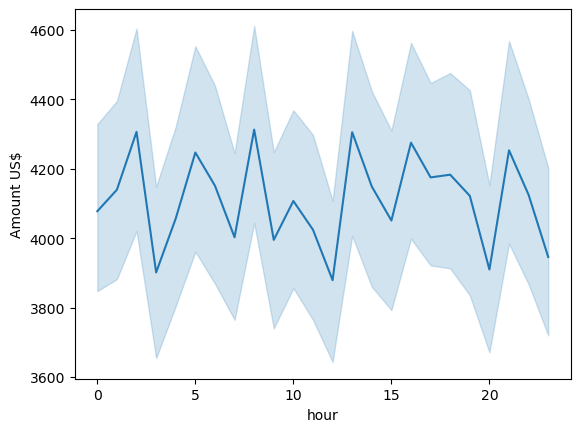

In [18]:
sns.lineplot(x=full_clean_df["hour"], y=full_clean_df["Amount US$"])

### Unique groups

* 12 different products in `Product`
* 2 genders in `Gender`
* 2 devices in `Device_Type`
* 3 states in `State`
* 3 cities in `City`
* 8 different categories in `Category`
* 4 different customer login types in `Customer_Login_type`
* 2 different delivery types in `Delivery_Type`
* 2 transaction states (success or fail) in `Transaction_Result`

In [19]:
full_clean_df.select(pl.all().n_unique())

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity,hour,minute,second
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
65535,64999,115,12,2,2,1,3,3,3,8,4,2,2,11183,2419,5,45798,12,24,60,60


No duplicates (GOOD!)

In [20]:
df.filter(df.is_duplicated())

Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,State_duplicated_0,City,Category,Customer_Login_type,Delivery_Type,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time,Quantity
i64,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,i64


### Visualization

Let's try to visualize some of the features to get a better understanding. Starting with the target feature.

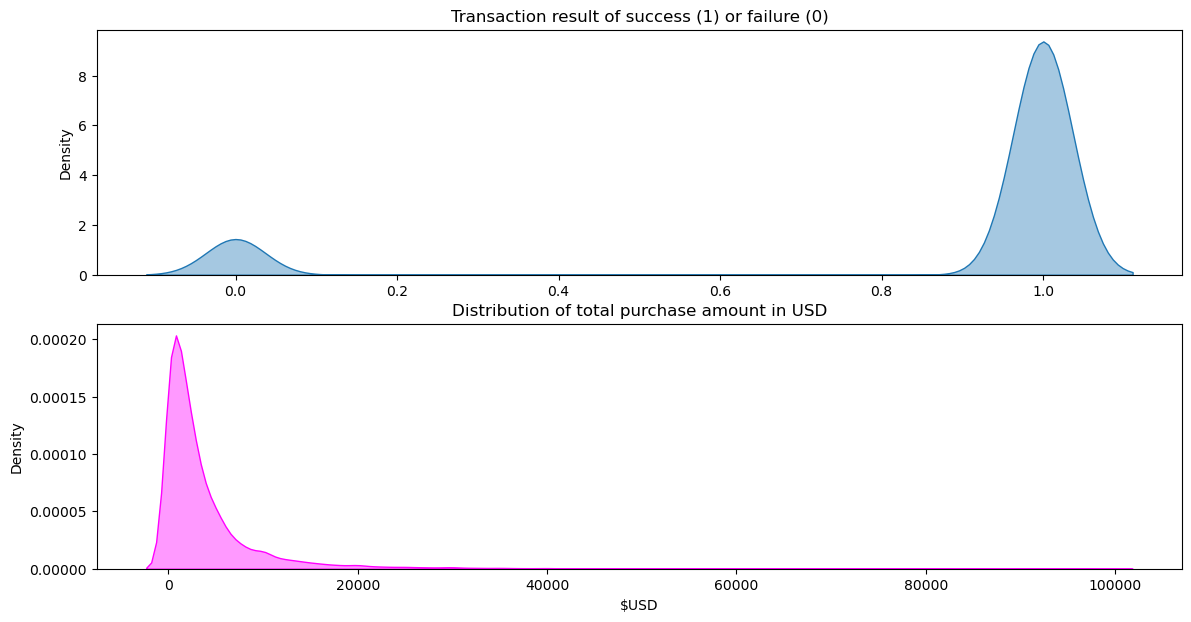

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(14,7 ))

sns.kdeplot(full_clean_df["Transaction_Result"], fill=True, alpha=.4, ax=ax[0])
ax[0].set_title("Transaction result of success (1) or failure (0)")

sns.kdeplot(full_clean_df["Amount US$"], fill=True, alpha=.4, color="magenta", ax=ax[1])
ax[1].set_title("Distribution of total purchase amount in USD")
ax[1].set_xlabel("$USD")

plt.savefig("images/transaction_result_kde.png", transparent=True, bbox_inches="tight", dpi=300)

The purchase quantity is highly multimodal in its distribution, suggesting unique in-cluster patterns.

Text(0.5, 1.0, 'Purchase quantity')

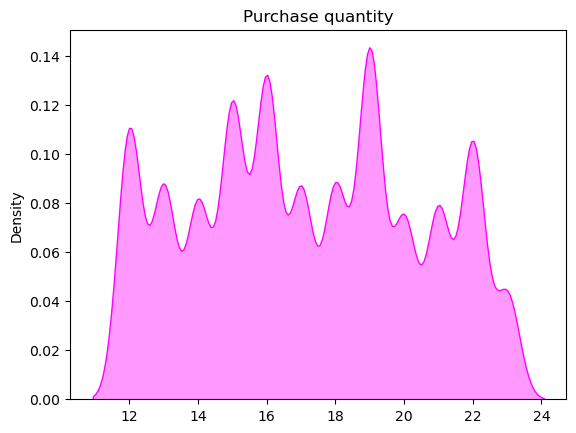

In [29]:
sns.kdeplot(full_clean_df["Quantity"], fill=True, alpha=.4, color="magenta")
plt.title("Purchase quantity")

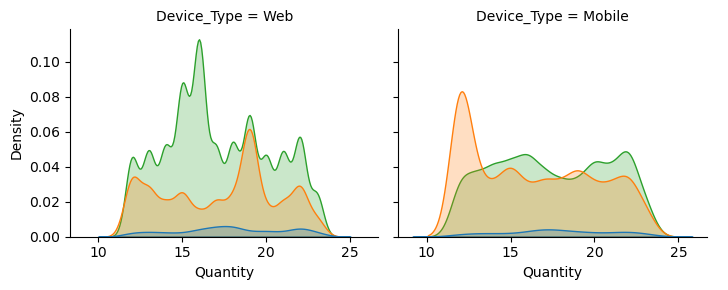

In [134]:
g = sns.FacetGrid(full_clean_df, col="Device_Type", aspect=1.2)
g.map_dataframe(sns.kdeplot, x="Quantity", fill=True, hue="State")
g.add_legend()

c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



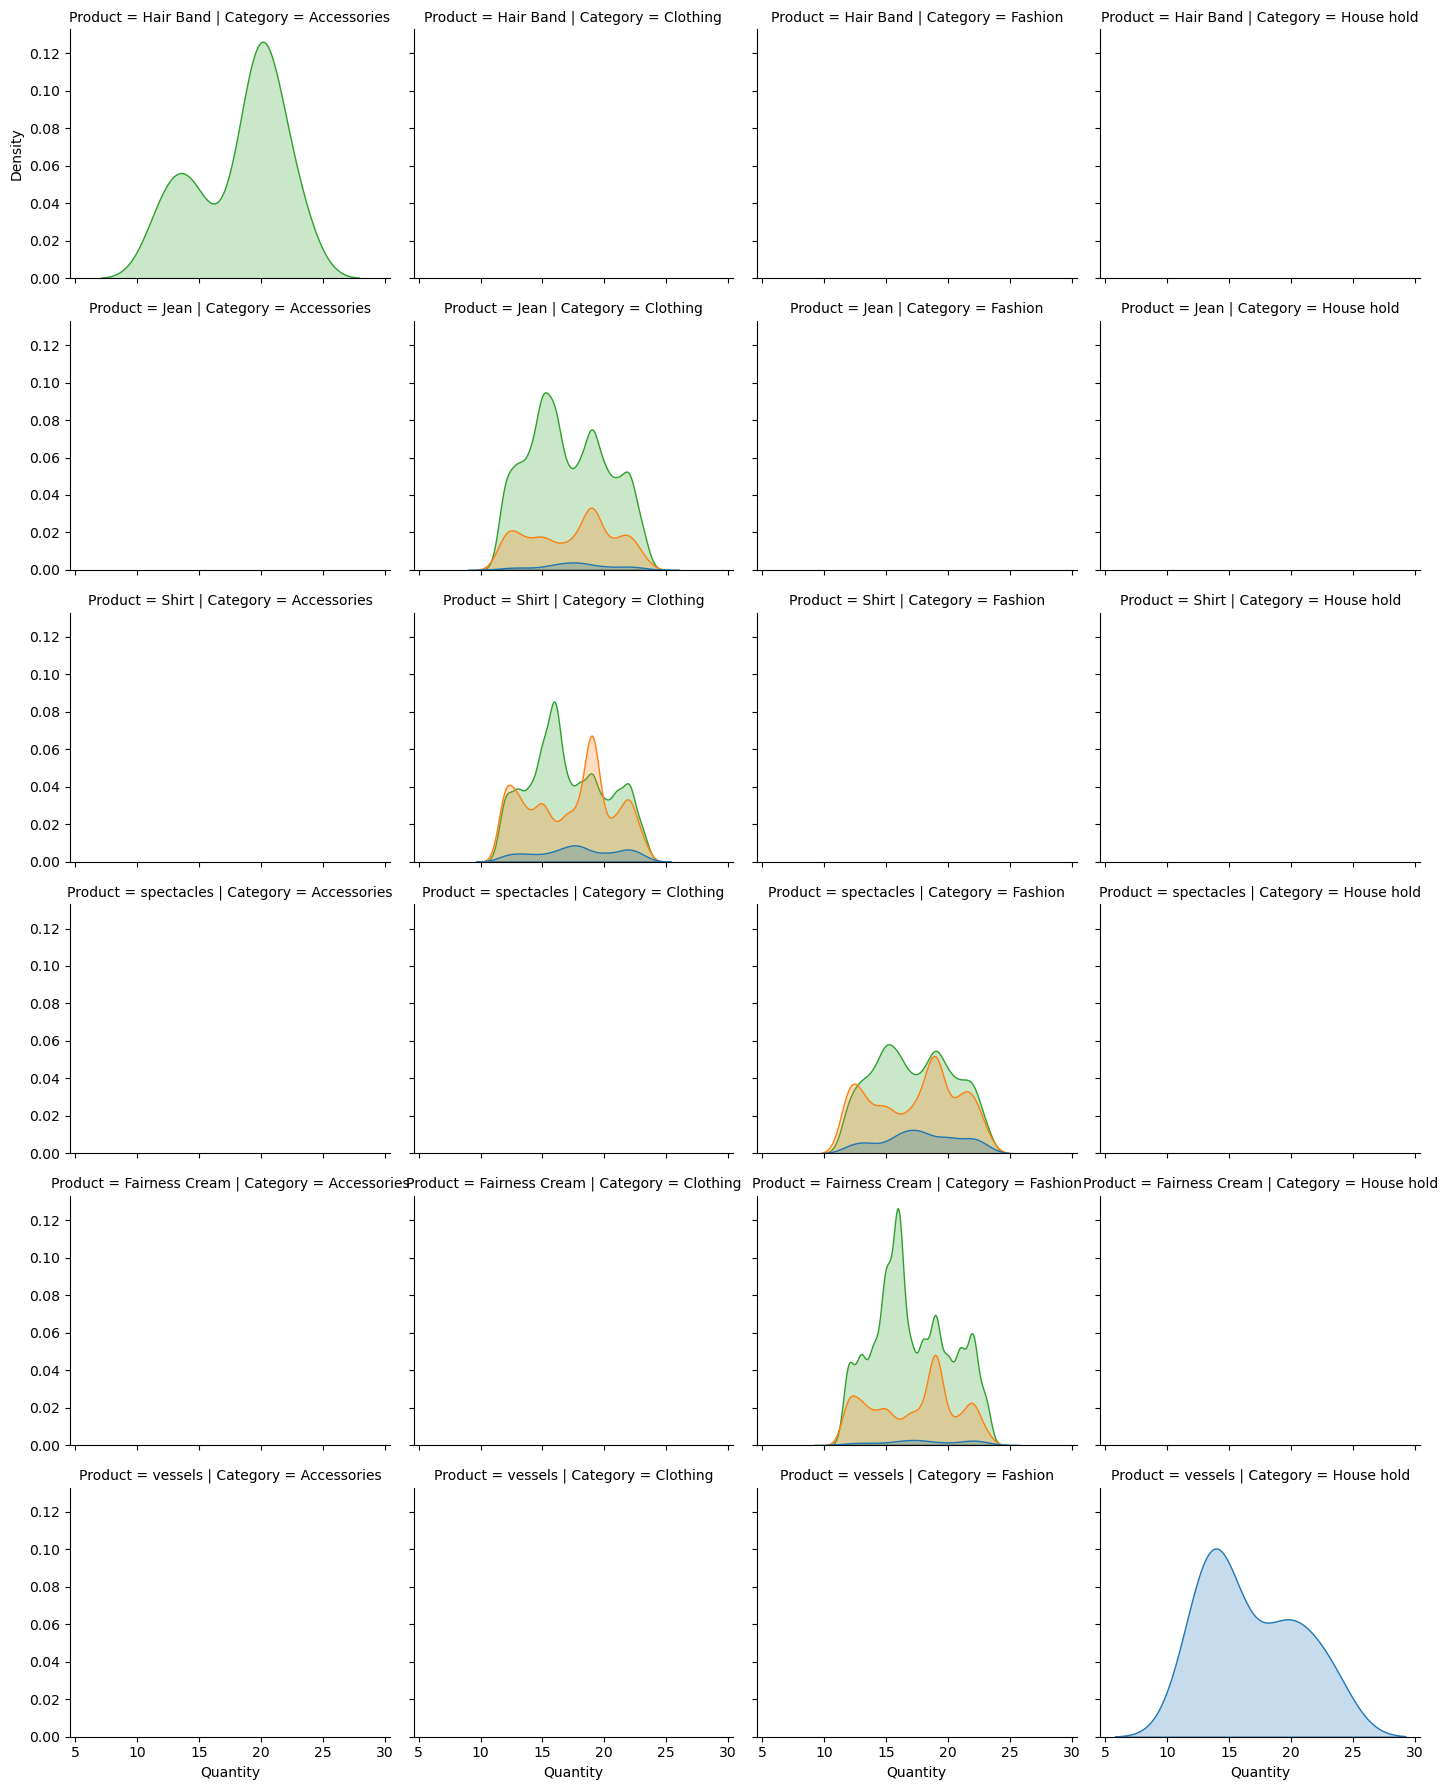

In [ ]:
g = sns.FacetGrid(full_clean_df.filter(pl.col("Device_Type").is_in(["Web"])), col="Category", row="Product", aspect=1.2)
g.map_dataframe(sns.kdeplot, x="Quantity", fill=True, hue="State")
g.add_legend()

Let's watch what happens over time with purchase quantity

In [30]:
full_clean_df = (full_clean_df.with_columns([
    pl.col("Date").str.to_date().alias("Date")
]))

There are large fluctuations over the short period from September 2013 to January 2014. <br>
Obviously, we see a Christmas effect by the end of December 2013. This has to be accounted for when we do feature engineering! <br>

One interesting observation can be seen from the plot - namely that failed purchases seem to be higher than transactions that were successful.

Text(0.5, 1.0, 'Purchase quantity over time with succeeded or failed purchases')

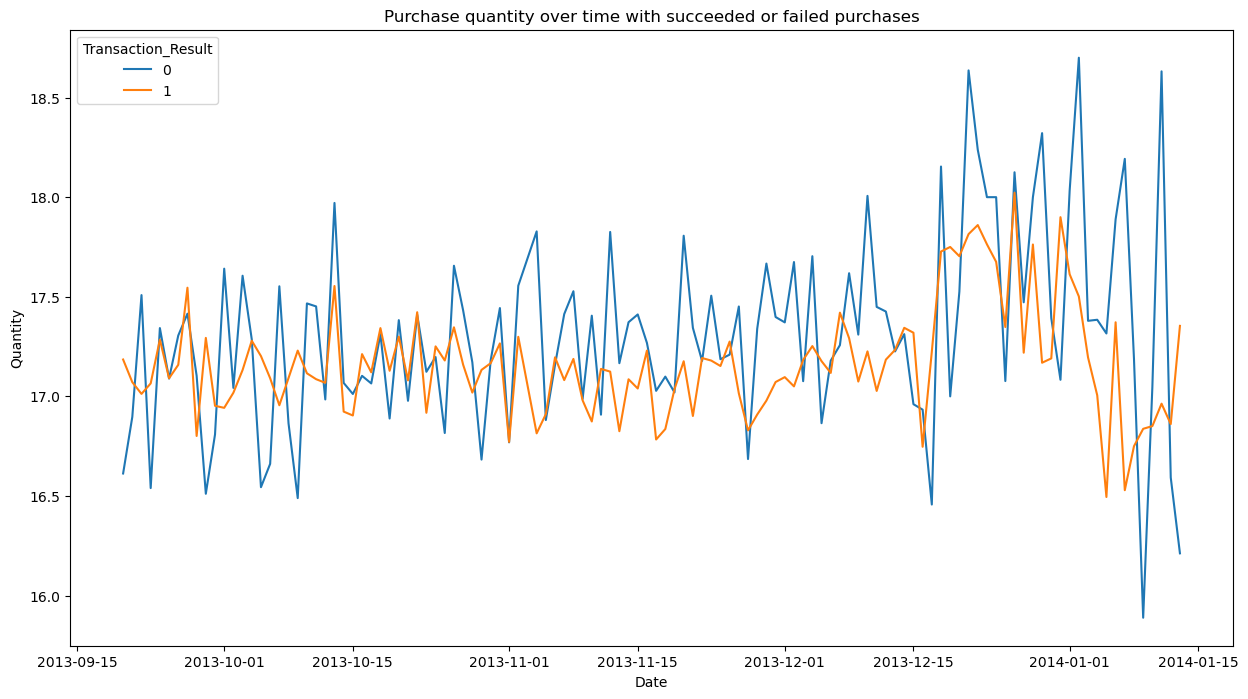

In [31]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=full_clean_df, errorbar=None, x="Date", y="Quantity", hue="Transaction_Result")
plt.title("Purchase quantity over time with succeeded or failed purchases")

For this part we'll import the time series module of the feature engineering pipeline engine to extract the time based features from `Date`.

In [33]:
from preprocessing.featureprocessor import TimeSeriesFeatureEngineer

In [34]:
feature_engineer = TimeSeriesFeatureEngineer( date_column="Date")
mod_df = feature_engineer.transform(full_clean_df.to_pandas().copy())

In [35]:
mod_df.columns

Index(['Transaction_id', 'customer_id', 'Date', 'Product', 'Gender',
       'Device_Type', 'Country', 'State', 'State_duplicated_0', 'City',
       'Category', 'Customer_Login_type', 'Delivery_Type',
       'Transaction_Result', 'Amount US$', 'Individual_Price_US$',
       'Year_Month', 'Time', 'Quantity', 'hour', 'minute', 'second',
       'day_of_week', 'day_of_month', 'day_of_year', 'week', 'month',
       'quarter', 'year', 'is_leap_year', 'is_month_start', 'is_month_end',
       'weekday_name', 'month_name', 'day_of_year_sin', 'day_of_year_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_week_sin',
       'day_of_week_cos', 'week_sin', 'week_cos', 'month_sin', 'month_cos'],
      dtype='object')

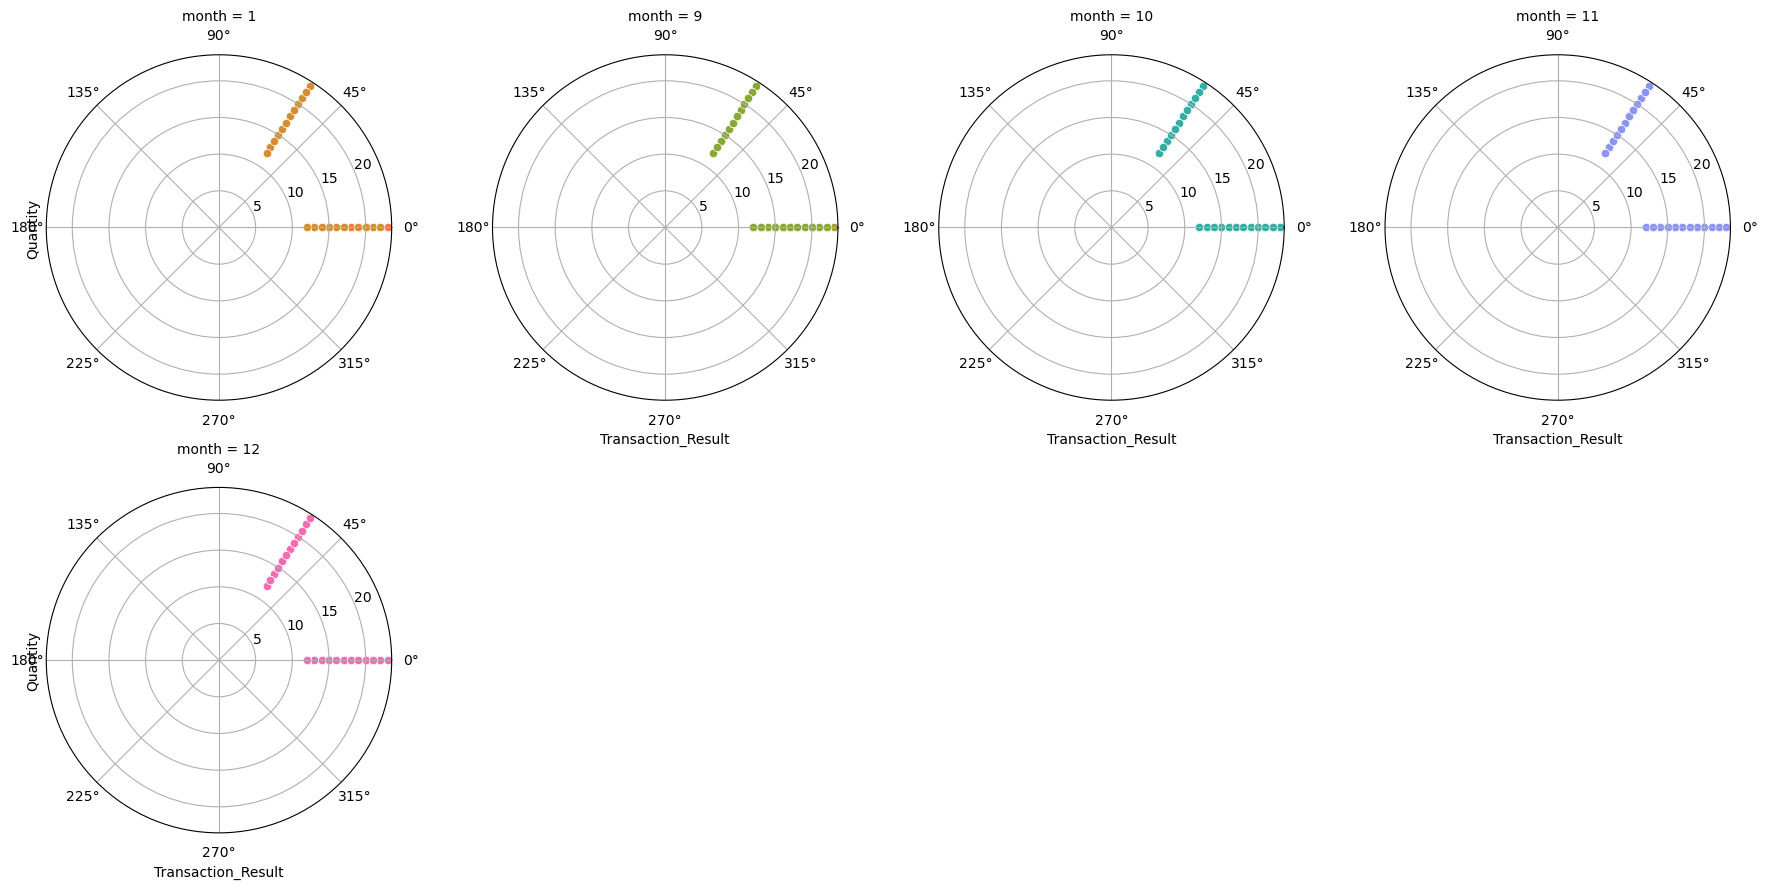

In [37]:
g = sns.FacetGrid(mod_df, col="month", hue="week",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False, col_wrap=4)

g.map(sns.scatterplot,  "Transaction_Result", "Quantity")

There does not seem to be enough data for us to find any interesting patterns. The data ranges about 1 fiscal quarter. <br>

That could suggest we should look at more granular levels. Let's watch the purchase amount on month and week day level first.

Text(0.5, 1.0, 'Average number of purchases by day of week and month of year')

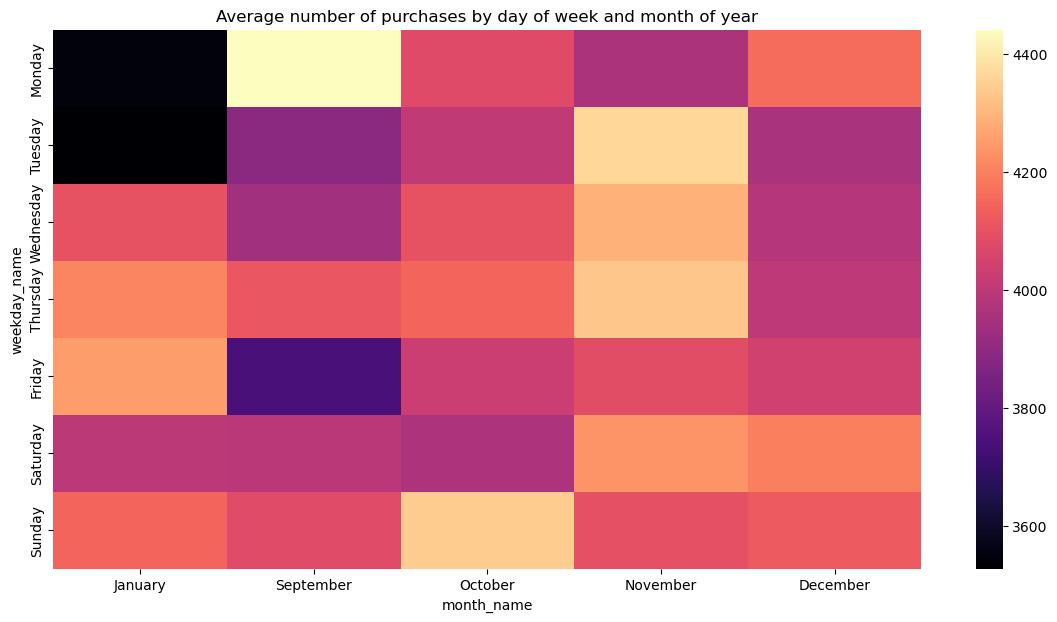

In [78]:
mod_df['weekday_name'] = pd.Categorical(mod_df['weekday_name'], 
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)

mod_df['month_name'] = pd.Categorical(mod_df['month_name'], 
                                  categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
                                  ordered=True)

plt.figure(figsize=(14, 7))

sns.heatmap(mod_df.pivot_table(index="weekday_name", 
                                columns="month_name", 
                                values="Amount US$", 
                                aggfunc="mean", 
                                observed=False), 
                                fmt=".1f",  
                                cmap="magma")

plt.title("Average number of purchases by day of week and month of year")

Going down to hourly level per month shows us high purchase amounts on 7th of January. This doesn't tell us if the transaction succeeded or not, only the amount.

Text(0.5, 1.0, 'Average number of purchases by hour and month of year')

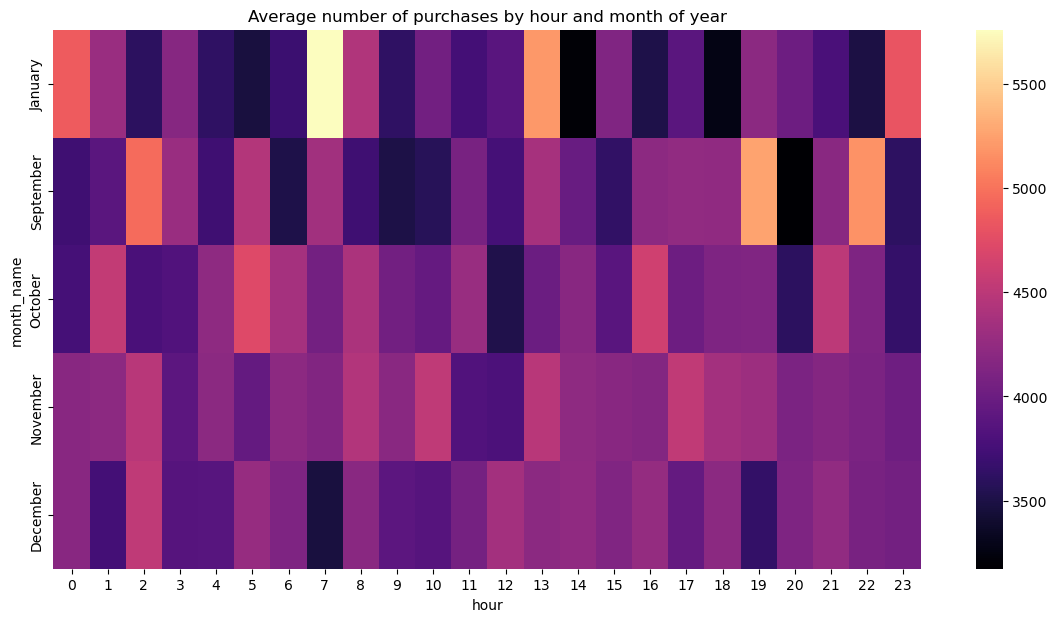

In [88]:
plt.figure(figsize=(14, 7))

sns.heatmap(mod_df.pivot_table(index="month_name", 
                                columns="hour", 
                                values="Amount US$", 
                                aggfunc="mean", 
                                observed=False), 
                                fmt=".1f",  
                                cmap="magma")

plt.title("Average number of purchases by hour and month of year")

On weekday level there are anomalies at 1 o'clock in the night and at 1 o'clock in the evening (13). 

Text(0.5, 1.0, 'Average number of purchases by hour and day of week')

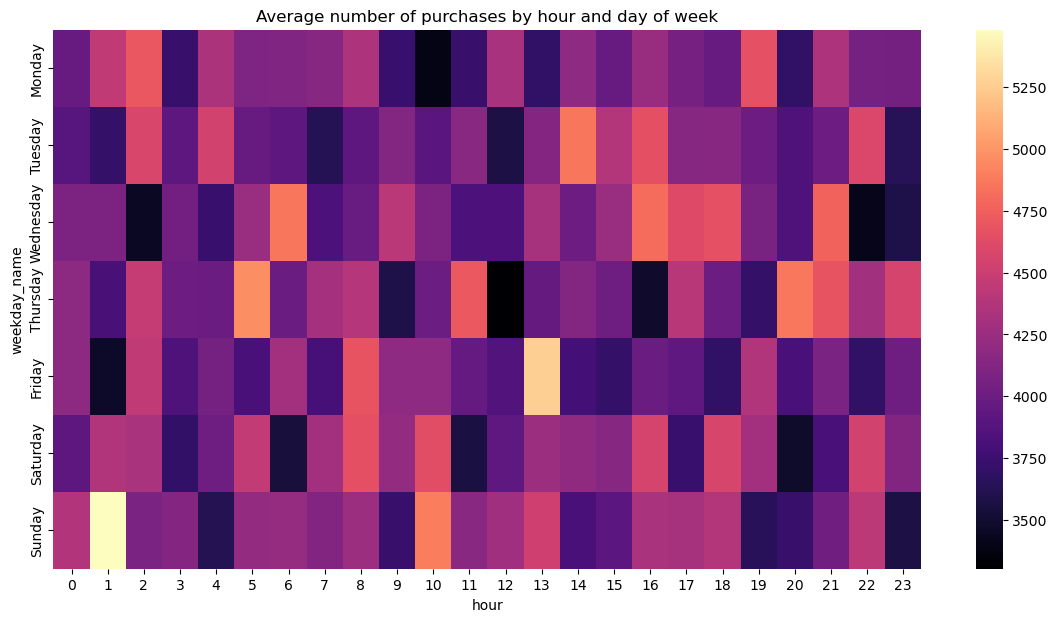

In [90]:
plt.figure(figsize=(14, 7))

sns.heatmap(mod_df.pivot_table(index="weekday_name", 
                                columns="hour", 
                                values="Amount US$", 
                                aggfunc="mean", 
                                observed=False), 
                                fmt=".1f",  
                                cmap="magma")

plt.title("Average number of purchases by hour and day of week")

### What type of problem at hand?

Well, we have time series data of a boolean feature as a target of interest: classification! <br>

But do we do time series classification or classification with time series features? Let's list some differences: <br>
<br>
* Time Series Classification
    * Concerned with which regime the time series is in (think of high and low interest rates over time or high and low prices)
    * Our job is to use a model that can classify in which state (regime) it is in
    * Pure time series models are used here like Markov Switching Regimes or Dynamic Time Warping

* Classification with time series features
    * This is concerned with classifying as usual in a regression setting
    * Order matters because we have time to respect
    * We extract time features and give to the model together with other features


I will go with the second approach since we have a few features that need hierarchical feature representation like Category-Product. <br>
This makes it easier. Had I've had more time I would build a pure hierarchical model with shared feature learning.


Some models good with tabular data:
* Tree-based models
    * XGBOOST
    * CatBoost
    * LightGBM
    * Random Forest (Swiss army knife of ML models)

* Classical models
    * Logistic regression (good for data up until 1 million rows)
    * Probit regression
    * Support Vector Machine
    * GAMs
    * Bayesian models

* Data hungry models
    * Simple neural nets (MLP)
    * CNN
    * LSTM
    * Transformers (tends to inject artificial patterns in time series data which we dont want)
    * Deep meta-learning GAM

* Ensemble modeling
    * Models of your choice!
    * Bagging, boosting and stacking


With all this stated, we will do Ensemble modeling and stack the model predictions with a geometric average to get the final prediction. <br>
Why geometric mean? Because a simple arithmetic average tends to be sensitive to outliers whereas the geometric average is not.


